<a href="https://colab.research.google.com/github/bhargav23/EVA4/blob/master/S9/EVA_S9_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-03-17 18:38:09.300561


In [0]:
import torch
import torchvision
import torchvision.transforms as transforms


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
sys.path.append('/content/drive/My Drive/EVA/S7')


In [0]:
import evatransforms
trans = evatransforms.Transforms

train_transforms = trans.train_transforms(
    [transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
    )

test_transforms = trans.test_transforms(
    [transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
    )


In [6]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transforms)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
import evadataloader
dataloader = evadataloader.DataLoader()

trainloader = dataloader.load(trainset)
testloader = dataloader.load(testset)

Let us show some of the training images, for fun.



  car plane  ship  ship


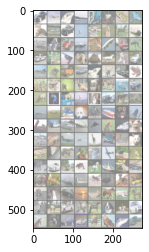

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import QuizDNN

net = QuizDNN.Net()

In [0]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [11]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = net.to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,248
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           9,248
             ReLU-10           [-1, 32, 32, 32]               0
      BatchNorm2d-11           [-1, 32, 32, 32]              64
          Dropout-12           [-1, 32, 32, 32]               0
        MaxPool2d-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1

In [0]:
import copy

In [0]:
import evascheduler

In [14]:
from torch.optim.lr_scheduler import StepLR
from evascheduler import train,test

model =  net.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch,criterion)
    scheduler.step()
    test(model, device, testloader)


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.1560784578323364 Batch_id=390 Accuracy=52.22: 100%|██████████| 391/391 [00:27<00:00, 15.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3904, Accuracy: 6096/10000 (60.96%)

EPOCH: 1


Loss=0.7414926290512085 Batch_id=390 Accuracy=68.88: 100%|██████████| 391/391 [00:26<00:00, 15.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3216, Accuracy: 6784/10000 (67.84%)

EPOCH: 2


Loss=0.8940719366073608 Batch_id=390 Accuracy=75.31: 100%|██████████| 391/391 [00:26<00:00, 15.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2930, Accuracy: 7070/10000 (70.70%)

EPOCH: 3


Loss=0.5764139294624329 Batch_id=390 Accuracy=79.30: 100%|██████████| 391/391 [00:27<00:00, 15.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2369, Accuracy: 7631/10000 (76.31%)

EPOCH: 4


Loss=0.6579145193099976 Batch_id=390 Accuracy=81.98: 100%|██████████| 391/391 [00:27<00:00, 14.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2194, Accuracy: 7806/10000 (78.06%)

EPOCH: 5


Loss=0.4142534136772156 Batch_id=390 Accuracy=84.01: 100%|██████████| 391/391 [00:27<00:00, 15.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1974, Accuracy: 8026/10000 (80.26%)

EPOCH: 6


Loss=0.353484570980072 Batch_id=390 Accuracy=88.52: 100%|██████████| 391/391 [00:27<00:00, 15.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1674, Accuracy: 8326/10000 (83.26%)

EPOCH: 7


Loss=0.24310199916362762 Batch_id=390 Accuracy=89.75: 100%|██████████| 391/391 [00:27<00:00, 15.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1610, Accuracy: 8390/10000 (83.90%)

EPOCH: 8


Loss=0.2738538384437561 Batch_id=390 Accuracy=90.11: 100%|██████████| 391/391 [00:27<00:00, 15.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1606, Accuracy: 8394/10000 (83.94%)

EPOCH: 9


Loss=0.25394850969314575 Batch_id=390 Accuracy=90.57: 100%|██████████| 391/391 [00:27<00:00, 15.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1643, Accuracy: 8357/10000 (83.57%)

EPOCH: 10


Loss=0.19680656492710114 Batch_id=390 Accuracy=90.96: 100%|██████████| 391/391 [00:27<00:00, 15.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1612, Accuracy: 8388/10000 (83.88%)

EPOCH: 11


Loss=0.3269999921321869 Batch_id=390 Accuracy=91.21: 100%|██████████| 391/391 [00:26<00:00, 15.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1578, Accuracy: 8422/10000 (84.22%)

EPOCH: 12


Loss=0.33562713861465454 Batch_id=390 Accuracy=91.78: 100%|██████████| 391/391 [00:27<00:00, 15.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1597, Accuracy: 8403/10000 (84.03%)

EPOCH: 13


Loss=0.2489258050918579 Batch_id=390 Accuracy=91.84: 100%|██████████| 391/391 [00:26<00:00, 15.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1591, Accuracy: 8409/10000 (84.09%)

EPOCH: 14


Loss=0.1847440004348755 Batch_id=390 Accuracy=91.87: 100%|██████████| 391/391 [00:26<00:00, 15.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1617, Accuracy: 8383/10000 (83.83%)

EPOCH: 15


Loss=0.23812082409858704 Batch_id=390 Accuracy=91.97: 100%|██████████| 391/391 [00:27<00:00, 15.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1578, Accuracy: 8422/10000 (84.22%)

EPOCH: 16


Loss=0.09528487175703049 Batch_id=390 Accuracy=92.06: 100%|██████████| 391/391 [00:27<00:00, 14.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1567, Accuracy: 8433/10000 (84.33%)

EPOCH: 17


Loss=0.21724000573158264 Batch_id=390 Accuracy=92.16: 100%|██████████| 391/391 [00:27<00:00, 15.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1595, Accuracy: 8405/10000 (84.05%)

EPOCH: 18


Loss=0.20657142996788025 Batch_id=390 Accuracy=92.23: 100%|██████████| 391/391 [00:27<00:00, 15.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1604, Accuracy: 8396/10000 (83.96%)

EPOCH: 19


Loss=0.19791030883789062 Batch_id=390 Accuracy=92.10: 100%|██████████| 391/391 [00:26<00:00, 15.18it/s]



Test set: Average loss: 0.1568, Accuracy: 8432/10000 (84.32%)

